In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pickle  # For saving the models

# Load the merged CSV data
df = pd.read_csv('merged_processed_data.csv', header=None)

# Columns to match the dataset's structure
df.columns = ['Voltage', 'Current', 'Real_Power', 'Reactive_Power', 'Apparent_Power', 'Power_Factor', 'Frequency', 'THD', 'Label']

# View the frequency distribution of the target variable (Label)
label_counts = df['Label'].value_counts()
print("Label Frequency Distribution (Overall):")
print(label_counts)

# Plot the frequency distribution of labels
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=df, palette='Set2')
plt.title('Frequency of Different Labels (Devices)')
plt.xlabel('Label (Device)')
plt.ylabel('Frequency')
plt.show()

# Splitting the data into features (X) and target (y)
X = df.drop(columns=['Label', 'Frequency', 'THD'])  # Exclude 'Frequency' and 'THD'
y = df['Label']

# Split the dataset into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# View the frequency distribution of labels in the training set
print("Label Frequency Distribution (Training Set):")
print(y_train.value_counts())

# View the frequency distribution of labels in the testing set
print("Label Frequency Distribution (Testing Set):")
print(y_test.value_counts())

# Plot the frequency distribution of labels in the training and testing sets
plt.figure(figsize=(14, 6))

# Training set plot
plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette='Set2', hue=y)
plt.title('Frequency of Labels in Training Set')
plt.xlabel('Label (Device)')
plt.ylabel('Frequency')

# Testing set plot
plt.subplot(1, 2, 2)
sns.countplot(x=y_test, palette='Set2', hue=y)
plt.title('Frequency of Labels in Testing Set')
plt.xlabel('Label (Device)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Standardizing the features (optional, but improves model performance in many cases)
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Save the scaler model
pickle.dump(scaler, open('scaler_model.pkl', 'wb'))  # Save scaler to .pkl file

# Initialize and train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Save the classifier model
pickle.dump(model, open('random_forest_classifier.pkl', 'wb'))  # Save model to .pkl file

# Predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 4, 8], yticklabels=[1, 2, 4, 8])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve and AUC for each class
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Feature Importances Plot
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(X_train_scaled.shape[1]), importances[indices], align='center')
plt.yticks(range(X_train_scaled.shape[1]), [X.columns[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.show()

In [ ]:
# Code without Label Names

Label Frequency Distribution (Overall):
8
4    1145
1    1141
2     788
8     582
Name: count, dtype: int64


C:\Users\DeepanshuMidha\AppData\Local\Temp\ipykernel_11816\3718943022.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.iloc[:, -1], palette='Set2')  # Assuming last column is 'Label'


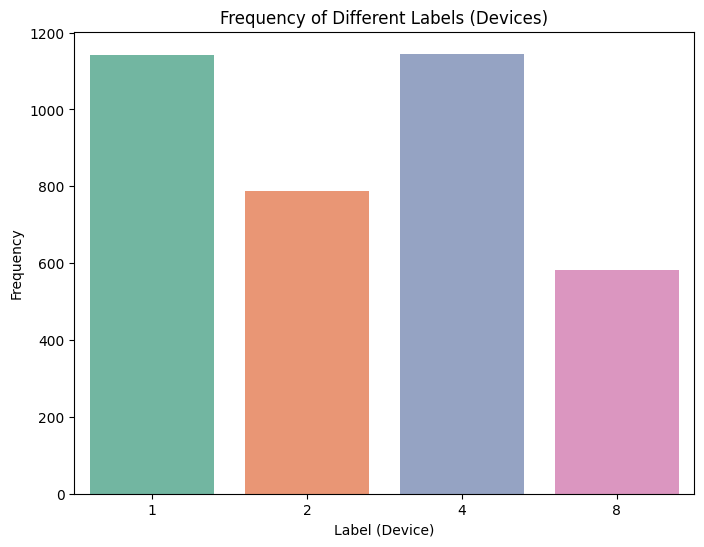

Label Frequency Distribution (Training Set):
8
4    927
1    882
2    649
8    466
Name: count, dtype: int64
Label Frequency Distribution (Testing Set):
8
1    259
4    218
2    139
8    116
Name: count, dtype: int64


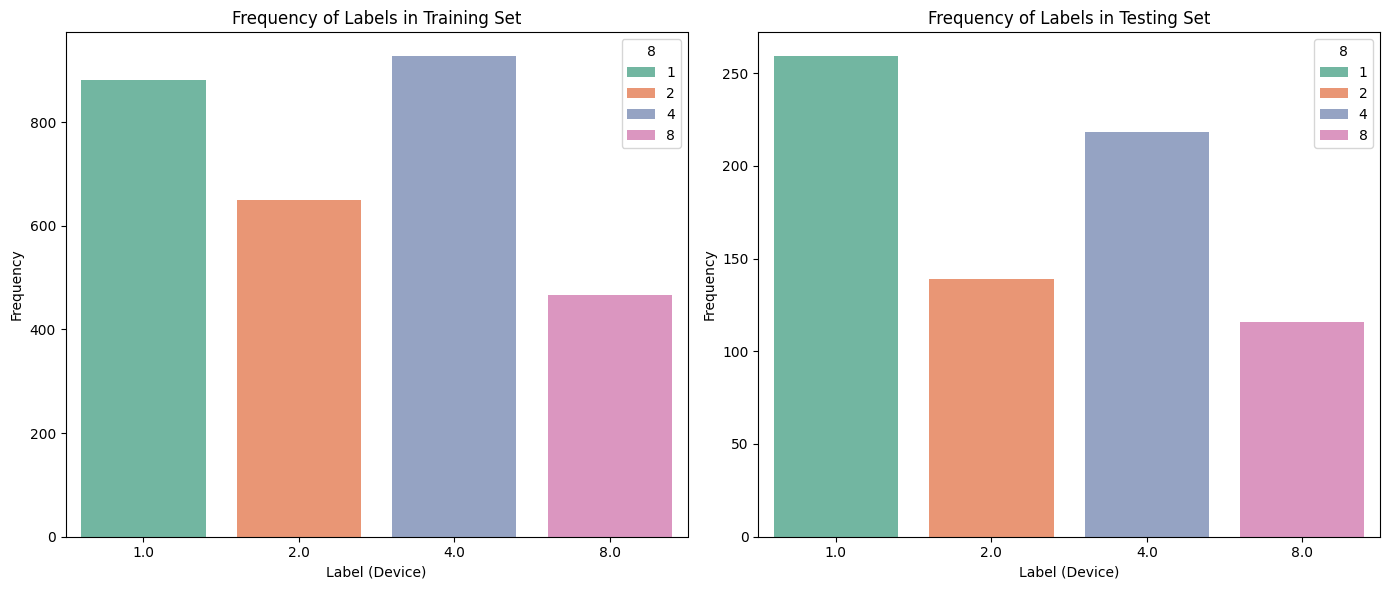

Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       259
           2       1.00      1.00      1.00       139
           4       1.00      1.00      1.00       218
           8       1.00      1.00      1.00       116

    accuracy                           1.00       732
   macro avg       1.00      1.00      1.00       732
weighted avg       1.00      1.00      1.00       732



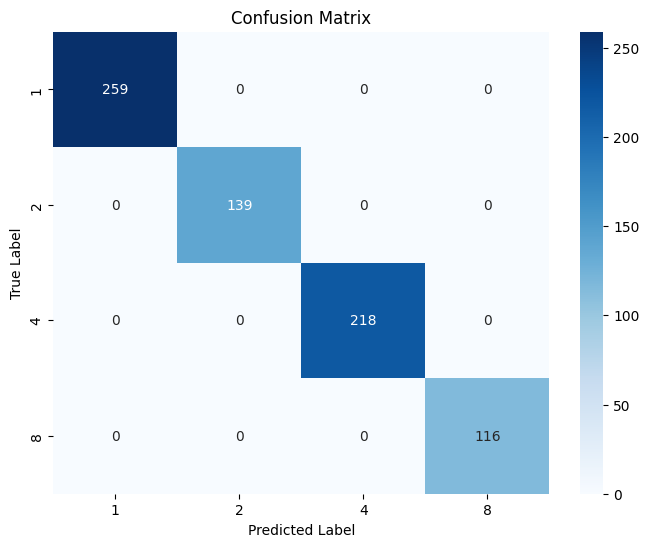

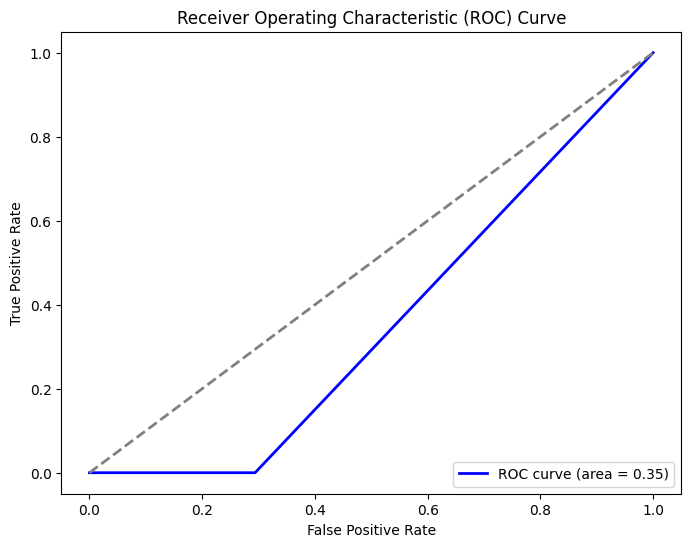

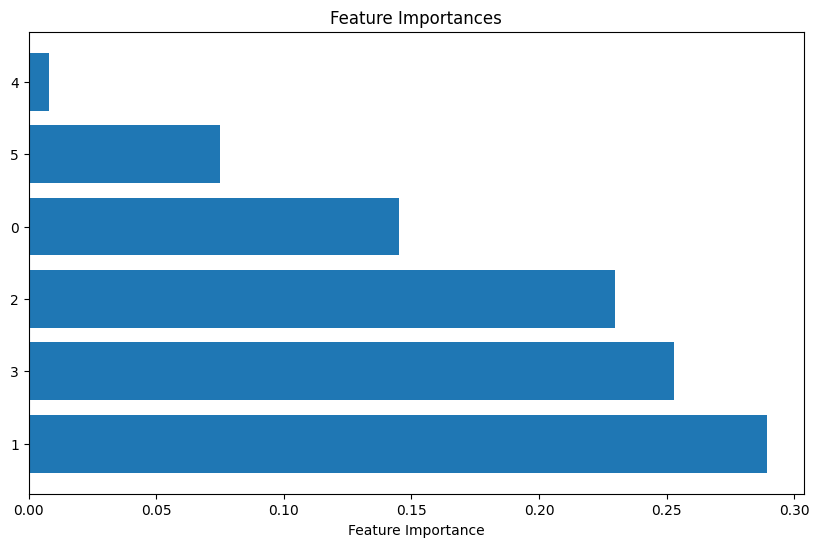

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pickle  # For saving the models

# Load the merged CSV data
df = pd.read_csv('merged_processed_data_with_all_off_state.csv', header=None)

# View the frequency distribution of the target variable (Label)
label_counts = df.iloc[:, -1].value_counts()  # Assuming the last column is 'Label'
print("Label Frequency Distribution (Overall):")
print(label_counts)

# Plot the frequency distribution of labels
plt.figure(figsize=(8, 6))
sns.countplot(x=df.iloc[:, -1], palette='Set2')  # Assuming last column is 'Label'
plt.title('Frequency of Different Labels (Devices)')
plt.xlabel('Label (Device)')
plt.ylabel('Frequency')
plt.show()

# Splitting the data into features (X) and target (y)
X = df.iloc[:, :-3]  # Exclude the last three columns ('Label', 'Frequency', 'THD')
y = df.iloc[:, -1]   # Last column as target (Label)

# Split the dataset into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# View the frequency distribution of labels in the training set
print("Label Frequency Distribution (Training Set):")
print(y_train.value_counts())

# View the frequency distribution of labels in the testing set
print("Label Frequency Distribution (Testing Set):")
print(y_test.value_counts())

# Plot the frequency distribution of labels in the training and testing sets
plt.figure(figsize=(14, 6))

# Training set plot
plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette='Set2', hue=y)
plt.title('Frequency of Labels in Training Set')
plt.xlabel('Label (Device)')
plt.ylabel('Frequency')

# Testing set plot
plt.subplot(1, 2, 2)
sns.countplot(x=y_test, palette='Set2', hue=y)
plt.title('Frequency of Labels in Testing Set')
plt.xlabel('Label (Device)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Standardizing the features (optional, but improves model performance in many cases)
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Save the scaler model
pickle.dump(scaler, open('scaler_model.pkl', 'wb'))  # Save scaler to .pkl file

# Initialize and train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Save the classifier model
pickle.dump(model, open('random_forest_classifier.pkl', 'wb'))  # Save model to .pkl file

# Predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve and AUC for each class
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Feature Importances Plot
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(X_train_scaled.shape[1]), importances[indices], align='center')
plt.yticks(range(X_train_scaled.shape[1]), [str(i) for i in indices])  # Using indices for features
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.show()  